# Black Friday EDA

importing libraries for EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

loading train data

In [2]:
black_train = pd.read_csv("D:\\complete machine learning course\\black friday\\train.csv")
black_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Loading test data

In [3]:
black_test = pd.read_csv("D:\\complete machine learning course\\black friday\\test.csv")
black_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Looking at train columns 

In [4]:
black_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Looking at train columns 

In [5]:
black_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

Combining both train and test sets

In [6]:
complete_black = black_train.append(black_test)
complete_black.head()

C:\Users\mahes\AppData\Local\Temp\ipykernel_3012\581435340.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  complete_black = black_train.append(black_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


Looking at shape

In [7]:
complete_black.shape

(783667, 12)

Looking at information of dataset

In [8]:
complete_black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


Numeric features

In [9]:
complete_black.select_dtypes(include=[np.number]).columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

categorical features

In [10]:
complete_black.select_dtypes(include = [object]).columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Looking at na values

In [11]:
complete_black.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [12]:
complete_black[complete_black.Product_Category_2.notna()].Product_Category_2.head(10)

1      6.0
3     14.0
5      2.0
6      8.0
7     15.0
8     16.0
10    11.0
13     2.0
14     8.0
15     5.0
Name: Product_Category_2, dtype: float64

In [13]:
complete_black.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [14]:
complete_black.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

Observation : The above are 17 unique values 

Observation : The values are discrete, so we will be changing na values with mode

In [15]:
pc2_mode = complete_black.Product_Category_2.mode()[0]
pc2_mode

8.0

In [16]:
complete_black.Product_Category_2.fillna(pc2_mode,inplace = True)

In [17]:
complete_black.Product_Category_2.value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

Result : we were replaced all na vlaues in Product_Category_2 with mode

Handling Product_Category_3 na values

In [18]:
complete_black.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

All are discrete values, so we can replace with mode

In [19]:
pc3_mode = complete_black.Product_Category_3.mode()[0]
pc3_mode

16.0

In [20]:
complete_black.Product_Category_3.fillna(pc3_mode,inplace = True)

In [21]:
complete_black.Product_Category_3.value_counts()

16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

Result : Product_Category_3 na values replaced with mode

In [22]:
complete_black.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

Conclusion for na values : All fetures were having not na values except Purchase because it is of test set

Categorical columns feature engineering

In [23]:
complete_black.select_dtypes(include = [object])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
233594,P00118942,F,26-35,B,4+
233595,P00254642,F,26-35,B,4+
233596,P00031842,F,26-35,B,4+
233597,P00124742,F,46-50,C,4+


In [24]:
complete_black.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [25]:
gender_d = pd.get_dummies(complete_black.Gender,prefix = 'Gender')
gender_d.head()

,Gender_F,Gender_M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
gender_d.drop('Gender_F',axis = 1,inplace = True)
gender_d.head()

,Gender_M
0,0
1,0
2,0
3,0
4,1


In [27]:
complete_black_g = pd.concat([complete_black,gender_d], axis = 1)
complete_black_g.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0,1


In [28]:
complete_black_g.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M'],
      dtype='object')

In [29]:
complete_black_g.drop('Gender',axis = 1, inplace = True)

In [30]:
complete_black_g.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M'],
      dtype='object')

In [44]:
# changing the type to int
complete_black_g.Gender_M = complete_black_g.Gender_M.astype('int')

In [45]:
complete_black_g.Gender_M.dtype

dtype('int32')

In [47]:
# checking the categorical feature
complete_black_g.select_dtypes(include = object).head()

,Product_ID,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,0-17,A,2
1,P00248942,0-17,A,2
2,P00087842,0-17,A,2
3,P00085442,0-17,A,2
4,P00285442,55+,C,4+


In [78]:
complete_black_g.Age.value_counts().index.sort_values()

Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object')

In [86]:
complete_black_g.Age.value_counts().sort_index()

0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
Name: Age, dtype: int64

ordinal encoding

In [53]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

In [80]:
oe = OrdinalEncoder(categories=[['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']])

In [81]:
complete_black_g['Age_en'] = oe.fit_transform(complete_black_g[['Age']])

In [89]:
complete_black_g['Age_en'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    6.0
Name: Age_en, dtype: float64

In [92]:
complete_black_g.Age.value_counts().sort_index()

0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
Name: Age, dtype: int64

In [97]:
complete_black_g['Age_en'].value_counts().index.sort_values()

Float64Index([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype='float64')

In [99]:
complete_black_g.Age_en.dtype

dtype('float64')

In [106]:
complete_black_g.drop('Age',axis = 1, inplace = True)

In [107]:
complete_black_g.columns

Index(['User_ID', 'Product_ID', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M',
       'Age_en'],
      dtype='object')

Age feature is droped

In [110]:
complete_black_g.select_dtypes(include = object).head()

,Product_ID,City_Category,Stay_In_Current_City_Years
0,P00069042,A,2
1,P00248942,A,2
2,P00087842,A,2
3,P00085442,A,2
4,P00285442,C,4+


In [113]:
complete_black_g.City_Category.value_counts().sort_index()

A    210244
B    329739
C    243684
Name: City_Category, dtype: int64

we have 3 categories we can do label encoding

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le = LabelEncoder()

In [118]:
complete_black_g['City_Category_en'] = le.fit_transform(complete_black_g['City_Category'])

In [120]:
complete_black_g.drop('City_Category', axis = 1, inplace = True)

In [122]:
complete_black_g.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_en,City_Category_en
0,1000001,P00069042,10,2,0,3,8.0,16.0,8370.0,0,0.0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200.0,0,0.0,0
2,1000001,P00087842,10,2,0,12,8.0,16.0,1422.0,0,0.0,0
3,1000001,P00085442,10,2,0,12,14.0,16.0,1057.0,0,0.0,0
4,1000002,P00285442,16,4+,0,8,8.0,16.0,7969.0,1,6.0,2


In [125]:
complete_black_g.select_dtypes(include = object).head()

,Product_ID,Stay_In_Current_City_Years
0,P00069042,2
1,P00248942,2
2,P00087842,2
3,P00085442,2
4,P00285442,4+


In [130]:
complete_black_g.Stay_In_Current_City_Years.value_counts().sort_index()

0     105716
1     276425
2     145427
3     135428
4+    120671
Name: Stay_In_Current_City_Years, dtype: int64

In [136]:
complete_black_g.Stay_In_Current_City_Years = complete_black_g.Stay_In_Current_City_Years.\
replace('4+', '4').astype(int)

In [137]:
complete_black_g.Stay_In_Current_City_Years

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int32

In [140]:
complete_black_g.select_dtypes(include = object).head()

,Product_ID
0,P00069042
1,P00248942
2,P00087842
3,P00085442
4,P00285442


In [143]:
complete_black_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   Gender_M                    783667 non-null  int32  
 10  Age_en                      783667 non-null  float64
 11  City_Category_en            783667 non-null  int32  
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 84.9+ MB


In [156]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (10,6)

<AxesSubplot:xlabel='Age_en', ylabel='Purchase'>

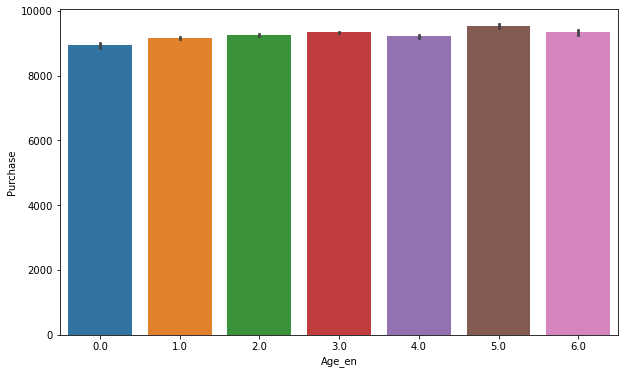

In [157]:
sns.barplot(x = 'Age_en', y = 'Purchase', data = complete_black_g)

<AxesSubplot:xlabel='Age_en', ylabel='Purchase'>

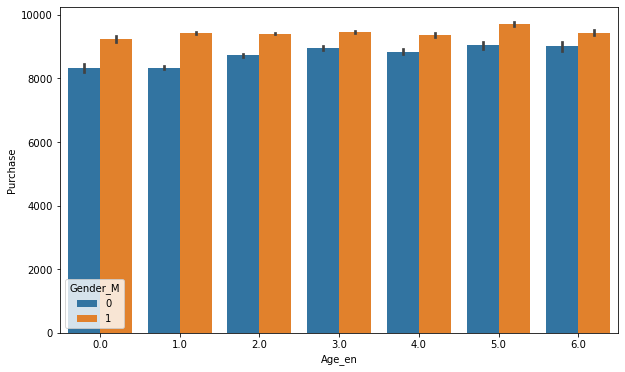

In [165]:
sns.barplot(x = 'Age_en', y = 'Purchase', hue = 'Gender_M', data = complete_black_g)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

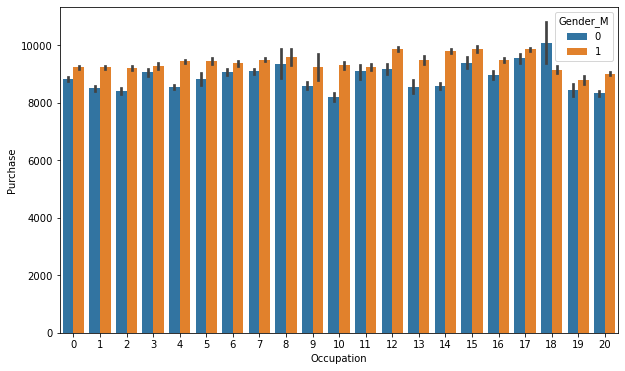

In [167]:
sns.barplot(x = 'Occupation', y = 'Purchase', hue = 'Gender_M', data = complete_black_g)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

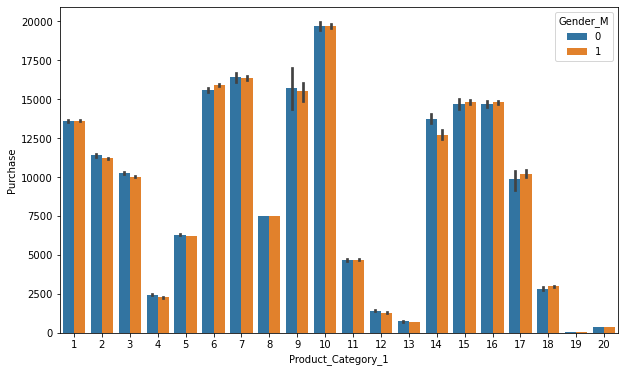

In [168]:
sns.barplot(x = 'Product_Category_1', y = 'Purchase', hue = 'Gender_M', data = complete_black_g)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

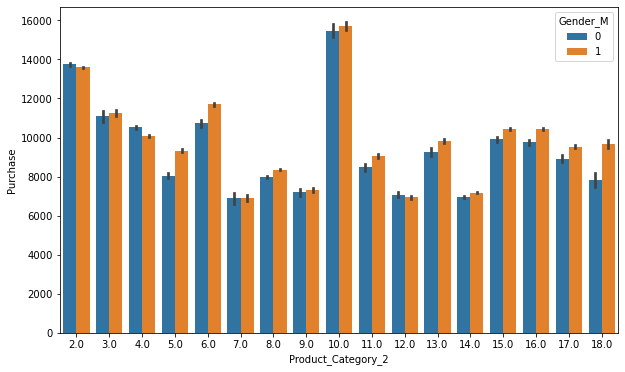

In [169]:
sns.barplot(x = 'Product_Category_2', y = 'Purchase', hue = 'Gender_M', data = complete_black_g)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

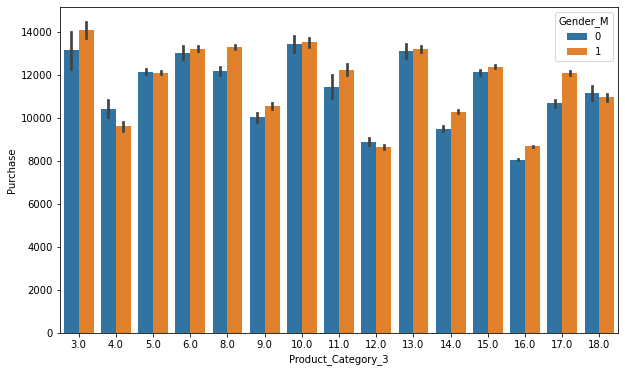

In [171]:
sns.barplot(x = 'Product_Category_3', y = 'Purchase', hue = 'Gender_M', data = complete_black_g)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

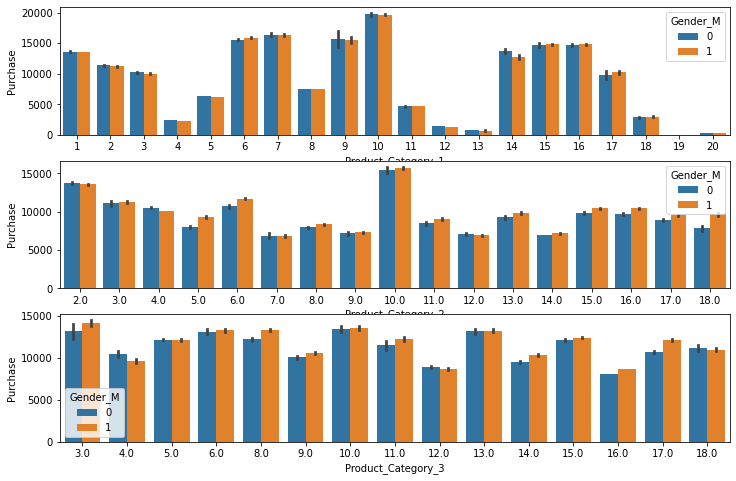

In [176]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize = (12,8))
sns.barplot(x = 'Product_Category_1', y = 'Purchase', hue = 'Gender_M', ax= axis[0], data = complete_black_g)
sns.barplot(x = 'Product_Category_2', y = 'Purchase', hue = 'Gender_M', ax= axis[1], data = complete_black_g)
sns.barplot(x = 'Product_Category_3', y = 'Purchase', hue = 'Gender_M', ax= axis[2], data = complete_black_g)

In [178]:
complete_black_g.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_en,City_Category_en
0,1000001,P00069042,10,2,0,3,8.0,16.0,8370.0,0,0.0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200.0,0,0.0,0
2,1000001,P00087842,10,2,0,12,8.0,16.0,1422.0,0,0.0,0
3,1000001,P00085442,10,2,0,12,14.0,16.0,1057.0,0,0.0,0
4,1000002,P00285442,16,4,0,8,8.0,16.0,7969.0,1,6.0,2


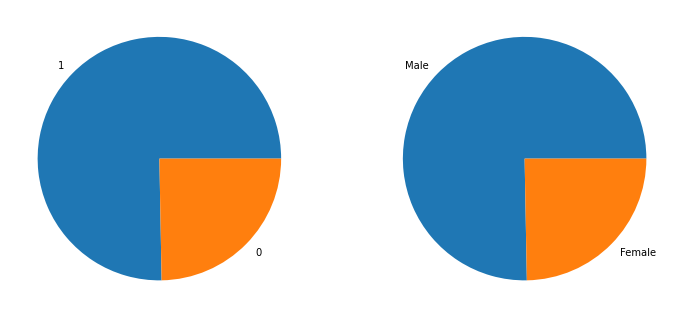

In [207]:
# complete_black_g.Gender_M.value_counts()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =  (12,8))
ax[0].pie(x = complete_black_g.Gender_M.value_counts(), labels = complete_black_g.Gender_M.value_counts().index)
ax[1].pie(x = complete_black_g.Gender_M.value_counts(), labels = ['Male','Female'])
plt.show()

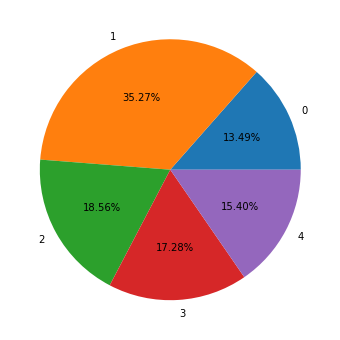

In [209]:
stay = complete_black_g.Stay_In_Current_City_Years.value_counts().sort_index()
plt.pie(x = stay.values, labels = stay.index,autopct = '%1.2f%%')
plt.show()